<a href="https://colab.research.google.com/github/prashantiyaramareddy/MyPython-Stuff/blob/master/Pytorch%5C4_Pytorch_Custom_Datasets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 04. Pytorch Custom Datasets

## 0. Importing Pytorch and setting up device agnostic code

In [41]:
import torch
from torch import nn

torch.__version__

'2.8.0+cu126'

In [42]:
# Set up device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [43]:
!nvidia-smi

Thu Sep 25 06:08:08 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   37C    P8              9W /   70W |       2MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----



```
# This is formatted as code
```

## 1. Get Data

Our dataset is a subset of the food 101 dataset. Food101 starts 101 different classes of food and 1000 images per class (750 training and 250 testing)

Our dataset starts with 3 classes of food and only 10% of images(75 training images and 25 testing)

When starting our ML projects , it's important to try things on a small scale and then increase the scale when necessary

In [44]:
import requests
import zipfile
from pathlib import Path

data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi"

if image_path.is_dir():
    print(f"{image_path} directory already exists")
else:
    print(f"Creating {image_path} directory")
    image_path.mkdir(parents=True, exist_ok=True)

# Download pizza, steak and sushi data
with open(data_path / "pizza_steak_sushi.zip", "wb") as f:
    request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
    print("Downloading pizza, steak and sushi data")
    f.write(request.content)

data/pizza_steak_sushi directory already exists


In [45]:
with zipfile.ZipFile(data_path / "pizza_steak_sushi.zip", "r") as zip_ref:
    print("Unzipping pizza, steak and sushi data")
    zip_ref.extractall(image_path)

Unzipping pizza, steak and sushi data


## 2. Becoming one with data

In [46]:
import os
def walk_through_dir(dir_path):
    for dirpath, dirnames, filenames in os.walk(dir_path):
        print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'")
walk_through_dir(image_path)

There are 2 directories and 0 images in 'data/pizza_steak_sushi'
There are 3 directories and 0 images in 'data/pizza_steak_sushi/test'
There are 0 directories and 25 images in 'data/pizza_steak_sushi/test/pizza'
There are 0 directories and 31 images in 'data/pizza_steak_sushi/test/sushi'
There are 0 directories and 19 images in 'data/pizza_steak_sushi/test/steak'
There are 3 directories and 0 images in 'data/pizza_steak_sushi/train'
There are 0 directories and 78 images in 'data/pizza_steak_sushi/train/pizza'
There are 0 directories and 72 images in 'data/pizza_steak_sushi/train/sushi'
There are 0 directories and 75 images in 'data/pizza_steak_sushi/train/steak'


In [47]:
# Set up train and test images
train_dir = image_path / "train"
test_dir = image_path / "test"

train_dir, test_dir

(PosixPath('data/pizza_steak_sushi/train'),
 PosixPath('data/pizza_steak_sushi/test'))

## 2.1 Visualizing and image

Let's write some code :

1. Get all image paths.
2. Pick a random image patch using Python's random.choice()
3. Get the image class name using 'pathlib.Path.parent.stem'
4. Since we are working with images, let's open the image with Python's PIL
5. We will show the image and print metadata


In [48]:
image_path

PosixPath('data/pizza_steak_sushi')

In [49]:
import random
from PIL import Image

# Set seed
#random.seed(42)

# 1. Get all image paths
image_path_list = list(image_path.glob("*/*/*.jpg"))
image_path_list[:10]

[PosixPath('data/pizza_steak_sushi/test/pizza/3475871.jpg'),
 PosixPath('data/pizza_steak_sushi/test/pizza/1152100.jpg'),
 PosixPath('data/pizza_steak_sushi/test/pizza/971934.jpg'),
 PosixPath('data/pizza_steak_sushi/test/pizza/3092704.jpg'),
 PosixPath('data/pizza_steak_sushi/test/pizza/2236338.jpg'),
 PosixPath('data/pizza_steak_sushi/test/pizza/2124579.jpg'),
 PosixPath('data/pizza_steak_sushi/test/pizza/1687143.jpg'),
 PosixPath('data/pizza_steak_sushi/test/pizza/2111981.jpg'),
 PosixPath('data/pizza_steak_sushi/test/pizza/2218680.jpg'),
 PosixPath('data/pizza_steak_sushi/test/pizza/2019408.jpg')]

In [50]:
# 2.  Pick a random image path
random_image_path = random.choice(image_path_list)

random_image_path

PosixPath('data/pizza_steak_sushi/train/pizza/928670.jpg')

In [51]:
#3. Get the image class from the path name
image_class = random_image_path.parent.stem
image_class

'pizza'

Random image path: data/pizza_steak_sushi/train/pizza/928670.jpg
Image class: pizza
Image height: 512
Image width: 512


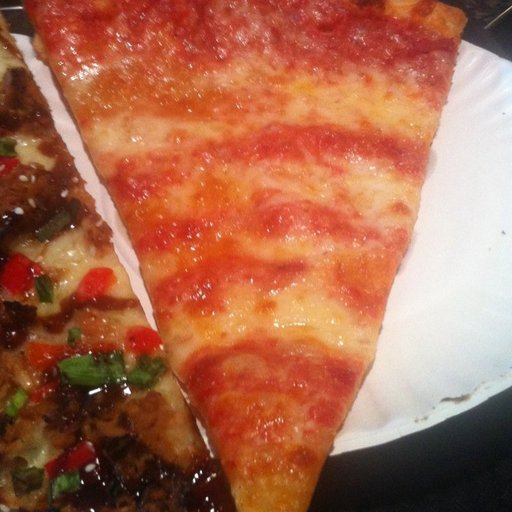

In [52]:
# 4. Open image
img = Image.open(random_image_path)

# 5. Print metadata
print(f"Random image path: {random_image_path}")
print(f"Image class: {image_class}")
print(f"Image height: {img.height}")
print(f"Image width: {img.width}")
img

(np.float64(-0.5), np.float64(511.5), np.float64(511.5), np.float64(-0.5))

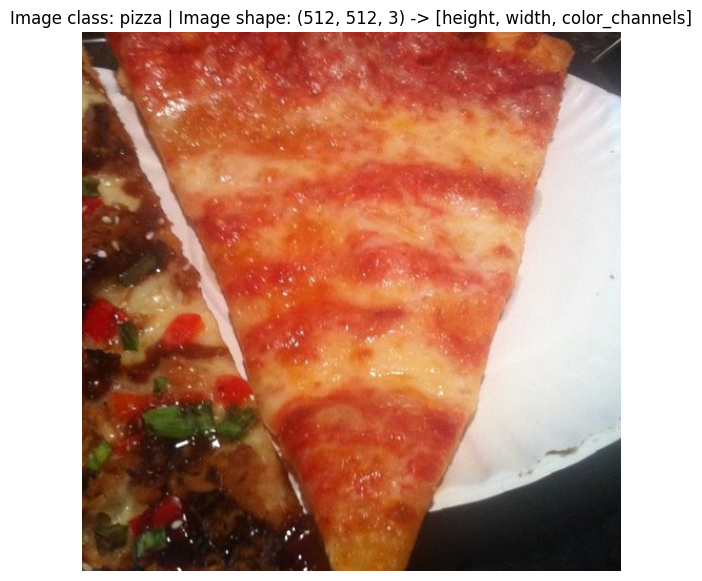

In [53]:
# Try to visualize image using matplotlib
import numpy as np
import matplotlib.pyplot as plt

# Turn image into an array
img_as_array = np.array(img)

# Plot the image with matplotlib
plt.figure(figsize=(10, 7))
plt.imshow(img_as_array)
plt.title(f"Image class: {image_class} | Image shape: {img_as_array.shape} -> [height, width, color_channels]")
plt.axis(False)

array([[[ 39,  22,  14],
        [ 42,  25,  17],
        [ 44,  27,  19],
        ...,
        [ 43,  42,  38],
        [ 51,  48,  43],
        [ 43,  40,  35]],

       [[ 34,  17,   9],
        [ 37,  20,  12],
        [ 39,  22,  14],
        ...,
        [ 43,  42,  37],
        [ 50,  47,  42],
        [ 55,  52,  47]],

       [[ 41,  24,  17],
        [ 41,  24,  17],
        [ 39,  24,  17],
        ...,
        [ 50,  47,  42],
        [ 43,  38,  34],
        [ 42,  37,  31]],

       ...,

       [[ 88,  73,  52],
        [122, 107,  84],
        [141, 125, 102],
        ...,
        [ 10,  11,  13],
        [  9,  10,  12],
        [ 10,  11,  13]],

       [[ 73,  60,  41],
        [ 98,  83,  62],
        [114,  99,  78],
        ...,
        [ 10,  11,  13],
        [ 10,  11,  13],
        [ 11,  12,  14]],

       [[ 73,  60,  41],
        [ 87,  74,  55],
        [ 92,  77,  58],
        ...,
        [ 10,  11,  13],
        [ 11,  12,  14],
        [ 12,  13,  15]]], dtype=uint8)
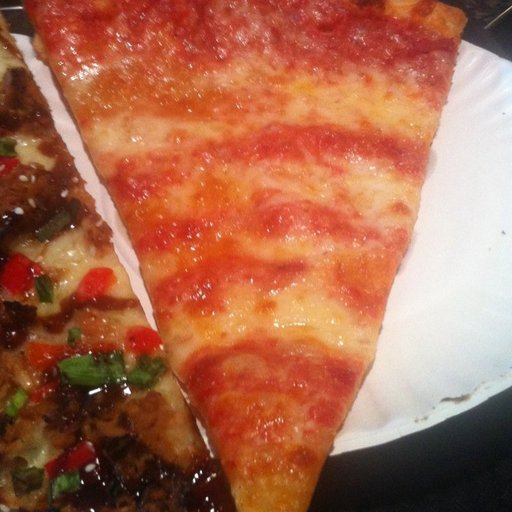

In [54]:
img_as_array

### 3. Transforming  data

Before we can use our image data with Pytorch:

1. Turn your target data into tensors ( in our case, numerical representation of our images).
2. Turn it into a 'torch.utils.data.Dataset' and subsequently a 'torch.utils.data.DataLoader'

In [55]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

## 3.1 Transforming data with torchvision.transforms


In [56]:
# transform for image

data_transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
])
data_transform(img)

tensor([[[0.2000, 0.2392, 0.3216,  ..., 0.2157, 0.1804, 0.2157],
         [0.2784, 0.2627, 0.3020,  ..., 0.1961, 0.2314, 0.2549],
         [0.3765, 0.2353, 0.2235,  ..., 0.2549, 0.2157, 0.1490],
         ...,
         [0.4039, 0.3922, 0.2588,  ..., 0.0588, 0.0588, 0.0627],
         [0.4039, 0.4745, 0.3961,  ..., 0.0588, 0.0510, 0.0549],
         [0.4980, 0.4353, 0.3490,  ..., 0.0549, 0.0471, 0.0471]],

        [[0.1529, 0.1882, 0.2196,  ..., 0.1765, 0.1608, 0.2000],
         [0.2078, 0.2118, 0.2118,  ..., 0.1686, 0.2039, 0.2275],
         [0.2510, 0.1569, 0.1451,  ..., 0.2235, 0.1961, 0.1373],
         ...,
         [0.2353, 0.2588, 0.1647,  ..., 0.0627, 0.0627, 0.0667],
         [0.2196, 0.2824, 0.2431,  ..., 0.0627, 0.0588, 0.0588],
         [0.3882, 0.2902, 0.2039,  ..., 0.0588, 0.0510, 0.0510]],

        [[0.1255, 0.1686, 0.1922,  ..., 0.1686, 0.1608, 0.1843],
         [0.1804, 0.2000, 0.1961,  ..., 0.1608, 0.2000, 0.2118],
         [0.1608, 0.1216, 0.1176,  ..., 0.2157, 0.1882, 0.

In [57]:
data_transform(img).shape

torch.Size([3, 64, 64])

### 3.1 Transforming data with 'torchvision.transforms'

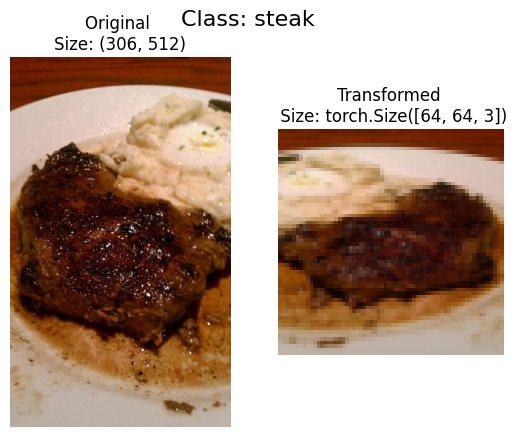

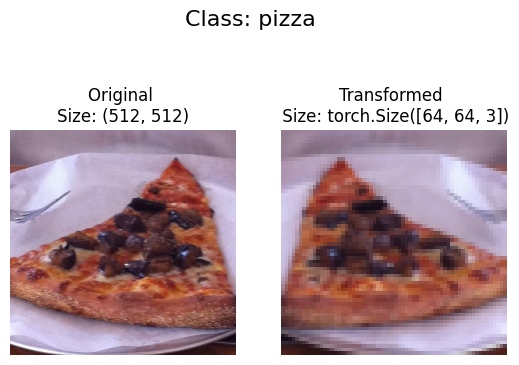

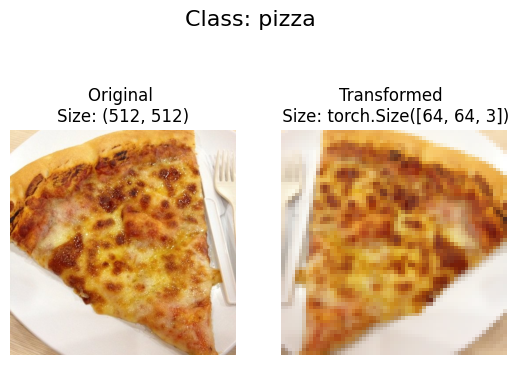

In [58]:
def plot_transformed_images(image_paths, transform, n= 3, seed = 42):
  """
  Selects random images from image_paths, transforms them
  with transform and plots n of them.
  """
  if seed:
    random.seed(seed)
  random_image_paths = random.sample(image_paths, k=n)

  for image_path in random_image_paths:
    with Image.open(image_path) as f:
      fig, ax = plt.subplots(1, 2)
      ax[0].imshow(f)
      ax[0].set_title(f"Original \nSize: {f.size}")
      ax[0].axis(False)

      # Transform and plot image
      transformed_image = transform(f).permute(1, 2, 0)
      ax[1].imshow(transformed_image)
      ax[1].set_title(f"Transformed \n Size: {transformed_image.shape}")
      ax[1].axis(False)
      fig.suptitle(f"Class: {image_path.parent.stem}", fontsize=16)

plot_transformed_images(image_path_list, data_transform)



## 4. Option 1: Loading image data using ImageFolder

We can load image classification data using 'torchvision.datasets.ImageFolder'



In [60]:
from torchvision import datasets
train_data = datasets.ImageFolder(root=train_dir,
                                  transform=data_transform,
                                  target_transform=None)
test_data = datasets.ImageFolder(root=test_dir,
                                 transform=data_transform)
train_data, test_data

(Dataset ImageFolder
     Number of datapoints: 225
     Root location: data/pizza_steak_sushi/train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 75
     Root location: data/pizza_steak_sushi/test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ))

In [61]:
# Get class names as a list
class_names = train_data.classes
class_names

['pizza', 'steak', 'sushi']

In [62]:
# Get class names as a dict
class_dict = train_data.class_to_idx
class_dict

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [63]:
# Check the lengths of the dataset
len(train_data), len(test_data)

(225, 75)

In [65]:
train_data.samples[0]

('data/pizza_steak_sushi/train/pizza/1008844.jpg', 0)

In [71]:
# Index on the train_data Dataset to get a single image and label
img,label = train_data[0][0], train_data[0][1]
print(f"Image tensor:\n {img}")
print(f"Image shape: {img.shape}")
print(f"Image datatype: {img.dtype}")
print(f"Image label: {label}")
print(f"Image class: {class_names[label]}")


Image tensor:
 tensor([[[0.1176, 0.1216, 0.1255,  ..., 0.0980, 0.1020, 0.1137],
         [0.1294, 0.1294, 0.1294,  ..., 0.0980, 0.0980, 0.1059],
         [0.1333, 0.1333, 0.1333,  ..., 0.0941, 0.0980, 0.1020],
         ...,
         [0.1686, 0.1647, 0.1686,  ..., 0.1255, 0.1098, 0.1098],
         [0.1686, 0.1647, 0.1686,  ..., 0.1098, 0.0941, 0.0902],
         [0.1647, 0.1647, 0.1686,  ..., 0.0980, 0.0863, 0.0863]],

        [[0.0588, 0.0588, 0.0588,  ..., 0.0745, 0.0706, 0.0745],
         [0.0627, 0.0627, 0.0627,  ..., 0.0745, 0.0706, 0.0745],
         [0.0706, 0.0706, 0.0706,  ..., 0.0745, 0.0745, 0.0706],
         ...,
         [0.2392, 0.2392, 0.2510,  ..., 0.1373, 0.1333, 0.1255],
         [0.2314, 0.2392, 0.2510,  ..., 0.1255, 0.1176, 0.1098],
         [0.2275, 0.2353, 0.2431,  ..., 0.1137, 0.1059, 0.1020]],

        [[0.0196, 0.0196, 0.0157,  ..., 0.0902, 0.0902, 0.0941],
         [0.0196, 0.0157, 0.0196,  ..., 0.0902, 0.0863, 0.0902],
         [0.0196, 0.0157, 0.0157,  ..., 0.0

Image shape: torch.Size([3, 64, 64]) -> [color_channels, height, width]
Image permute shape: torch.Size([64, 64, 3])
Image datatype: torch.float32


(np.float64(-0.5), np.float64(63.5), np.float64(63.5), np.float64(-0.5))

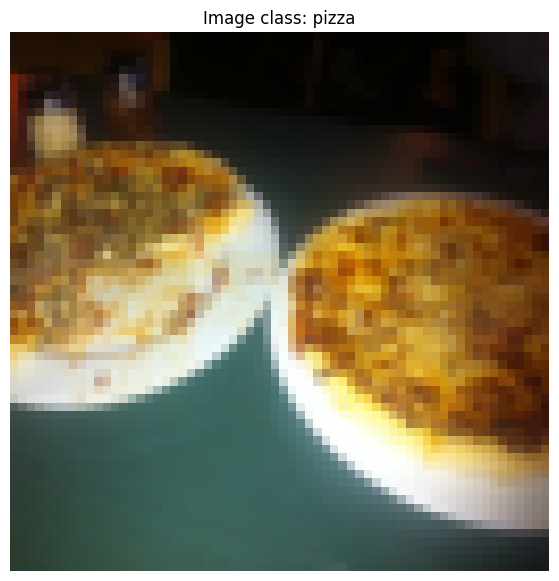

In [77]:
# Rearrange order dimensions
img_permute = img.permute(1, 2, 0)
img_permute
#

# Print out different shapes
print(f"Image shape: {img.shape} -> [color_channels, height, width]")
print(f"Image permute shape: {img_permute.shape}")
print(f"Image datatype: {img_permute.dtype}")

# Plot the image
plt.figure(figsize=(10, 7))
plt.imshow(img_permute)
plt.title(f"Image class: {class_names[label]}")
plt.axis(False)

## 4.1 Convert loaded images into dataloaders

'DataLoader' is going to help us turn our 'Dataset' into iterables and we can customize the batch_size so our model can learn faster.


In [78]:
!nvidia-smi

Thu Sep 25 06:34:03 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   37C    P8              9W /   70W |       2MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [81]:
import os
os.cpu_count

<function posix.cpu_count()>

In [96]:
# Turn train and test data sets into data loaders
from torch.utils.data import DataLoader
BATCH_SIZE = 1
train_dataloader = DataLoader(dataset=train_data,
                               batch_size=BATCH_SIZE,
                               num_workers=1,
                               shuffle=True)
test_dataloader = DataLoader(dataset=test_data,
                             batch_size=BATCH_SIZE,
                             num_workers=1,
                             shuffle=False)
train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x786815c644d0>,
 <torch.utils.data.dataloader.DataLoader at 0x786815c663c0>)

In [97]:
len(train_dataloader), len(test_dataloader)

(225, 75)

In [98]:
img, label = next(iter(train_dataloader))

# Batch size will now be 1, you can change the batch size if you like

print(f"Image shape: {img.shape} -> [batch_size, color_channels, height, width]")
print(f"Label shape: {label.shape}")

Image shape: torch.Size([1, 3, 64, 64]) -> [batch_size, color_channels, height, width]
Label shape: torch.Size([1])


## 5 Option 2: Loading Image Data with a custom dataset

1. Want to be able to load images from file
2. Want to be able to get class names from the Dataset
3. Want to be able to get classes as dictionary from the dataset

Pros:
* Can create a 'Dataset' out of almost anything
* Not limited to Pytorch pre built 'Dataset' FunctionSchema

Cons:
* Even though you could create 'Dataset' out of almost anything, it does not mean it will work ...
* Using a custom 'Dataset' often results in us writing more code, which could be prone to errors or performance issues.

In [99]:
import os
import pathlib
import torch

from PIL import Image
from torch.utils.data import Dataset

from torchvision import transforms
from typing import Tuple, Dict, List



In [100]:
# Instance of torchvision.datasets.ImageFolder()
train_data.classes, train_data.class_to_idx

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

### 5.1 Creating a helper function to get class names

We want a function to:
1. Get the class names using 'os.scandir()' to traverse a target directory ( ideally the directory is in standard image classification format).format
2. Raise an error if the class names are not found ( if this happens, there might be something wrong with the directory structures)
3. Turn the class names into a dict and a list and return them.dict



In [101]:
# Set up path for target directory
target_directory = train_dir
print(f"Target directory: {target_directory}")

# Get the class names from the target directory
class_names_found = sorted([entry.name for entry in list(os.scandir(target_directory)) if entry.is_dir()])
class_names_found
#

Target directory: data/pizza_steak_sushi/train


['pizza', 'steak', 'sushi']

In [102]:
list(os.scandir(target_directory))

[<DirEntry 'pizza'>, <DirEntry 'sushi'>, <DirEntry 'steak'>]